In [24]:
library(googlesheets)
suppressMessages(library(dplyr))

gs_gap() %>% 
  gs_copy(to = "Gapminder")

gs_ls("Gapminder")

gap <- gs_title("Gapminder")

In [21]:
install.packages("googlesheets")

Installing package into 'C:/Users/oldyu/R/win-library/3.5'
(as 'lib' is unspecified)


package 'googlesheets' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\oldyu\AppData\Local\Temp\Rtmpg3750f\downloaded_packages


In [5]:
#Load packages
library(foreign)
library(censReg)
library(stargazer)
library(sampleSelection)



In [10]:
#Read in Wooldridge data
wage1 <- read.dta("http://fmwww.bc.edu/ec-p/data/wooldridge/wage1.dta")

In [11]:
#Make everything below 3 for wage equal to 3
#We're faking some censored data here.
wage1[wage1$wage<3,]$wage <- NA

In [12]:
#Run our Tobit
tobitmodel <- censReg(wage~female+educ+tenure,data=wage1,left=3)
stargazer(tobitmodel,type='text')


                        Dependent variable:    
                    ---------------------------
                               wage            
-----------------------------------------------
female                       -1.812***         
                              (0.303)          
                                               
educ                         0.582***          
                              (0.056)          
                                               
tenure                       0.194***          
                              (0.021)          
                                               
logSigma                     1.146***          
                              (0.034)          
                                               
Constant                      -1.521*          
                              (0.783)          
                                               
-----------------------------------------------
Observations                    465    

In [14]:
#Get marginal effects for Tobit
margEff(tobitmodel)


female       educ     tenure 
-1.5291088  0.4913174  0.1634193

In [7]:
#Make everything below 3 for wage equal to 3
#We're faking some censored data here.
wage1[wage1$wage<3,]$wage <- 3

In [8]:
#Run our Tobit
tobitmodel <- censReg(wage~female+educ+tenure,data=wage1,left=3)
stargazer(tobitmodel,type='text')


                        Dependent variable:    
                    ---------------------------
                               wage            
-----------------------------------------------
female                       -2.084***         
                              (0.305)          
                                               
educ                         0.682***          
                              (0.056)          
                                               
tenure                       0.189***          
                              (0.021)          
                                               
logSigma                     1.192***          
                              (0.035)          
                                               
Constant                     -3.070***         
                              (0.783)          
                                               
-----------------------------------------------
Observations                    526    

In [13]:
#Get marginal effects for Tobit
margEff(tobitmodel)


female       educ     tenure 
-1.5291088  0.4913174  0.1634193

In [16]:







#Now we want everything 3 or below to be missing
#We're faking sample selection here
# wage1[wage1$wage==3,]$wage <- NA

#Run a Heckman selection model
heckmodel <- selection(!is.na(wage)~female+educ+tenure+south,wage~female+educ+tenure,data=wage1)
stargazer(heckmodel,type='text')



                   Dependent variable:    
               ---------------------------
                          wage            
------------------------------------------
female                   -1.782           
                        (Inf.000)         
                                          
educ                      0.666           
                        (Inf.000)         
                                          
tenure                    0.189           
                        (Inf.000)         
                                          
Constant                 -2.674           
                        (Inf.000)         
                                          
------------------------------------------
Observations               526            
Log Likelihood         -1,249.147         
rho                  1.000 (Inf.000)      
Note:          *p<0.1; **p<0.05; ***p<0.01


https://stats.idre.ucla.edu/r/dae/tobit-models/

The dataset contains 200 observations. The academic aptitude variable is apt, the reading and math test scores are read and math respectively. The variable prog is the type of program the student is in, it is a categorical (nominal) variable that takes on three values, academic (prog = 1), general (prog = 2), and vocational (prog = 3). The variable id is an identification variable.



In [51]:
require(ggplot2)
require(GGally)
require(VGAM)

In [38]:
dat <- read.csv("https://stats.idre.ucla.edu/stat/data/tobit.csv")


In [39]:
summary(dat)

       id              read            math               prog    
 Min.   :  1.00   Min.   :28.00   Min.   :33.00   academic  : 45  
 1st Qu.: 50.75   1st Qu.:44.00   1st Qu.:45.00   general   :105  
 Median :100.50   Median :50.00   Median :52.00   vocational: 50  
 Mean   :100.50   Mean   :52.23   Mean   :52.65                   
 3rd Qu.:150.25   3rd Qu.:60.00   3rd Qu.:59.00                   
 Max.   :200.00   Max.   :76.00   Max.   :75.00                   
      apt       
 Min.   :352.0  
 1st Qu.:575.5  
 Median :633.0  
 Mean   :640.0  
 3rd Qu.:705.2  
 Max.   :800.0  

In [41]:
library(ggplot2)

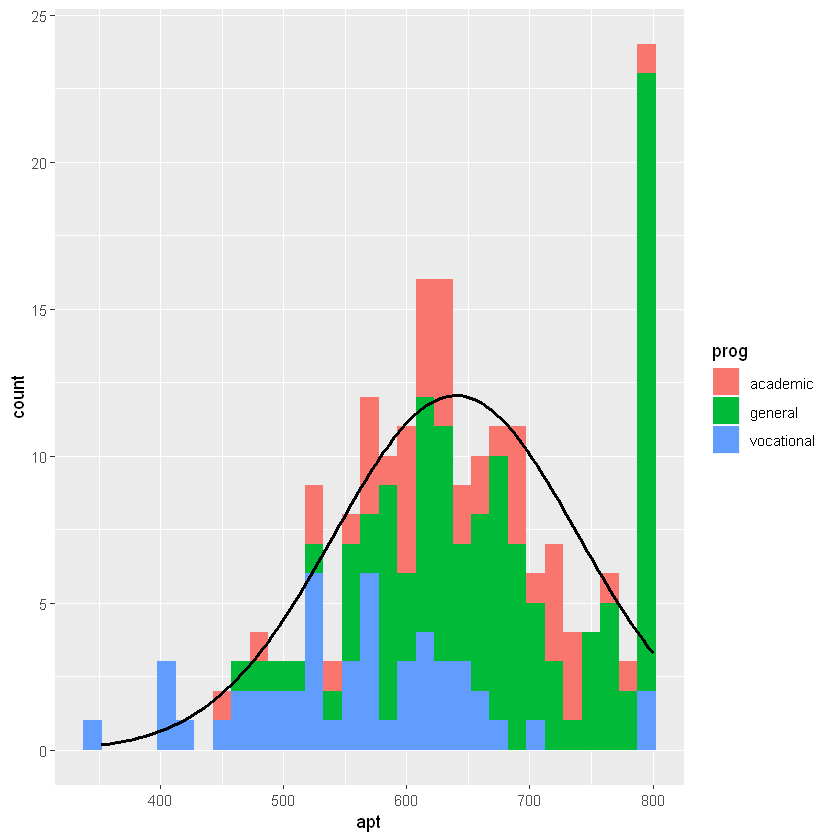

In [42]:
# function that gives the density of normal distribution
# for given mean and sd, scaled to be on a count metric
# for the histogram: count = density * sample size * bin width
f <- function(x, var, bw = 15) {
  dnorm(x, mean = mean(var), sd(var)) * length(var)  * bw
}

# setup base plot
p <- ggplot(dat, aes(x = apt, fill=prog))

# histogram, coloured by proportion in different programs
# with a normal distribution overlayed
p + stat_bin(binwidth=15) +
  stat_function(fun = f, size = 1,
    args = list(var = dat$apt))

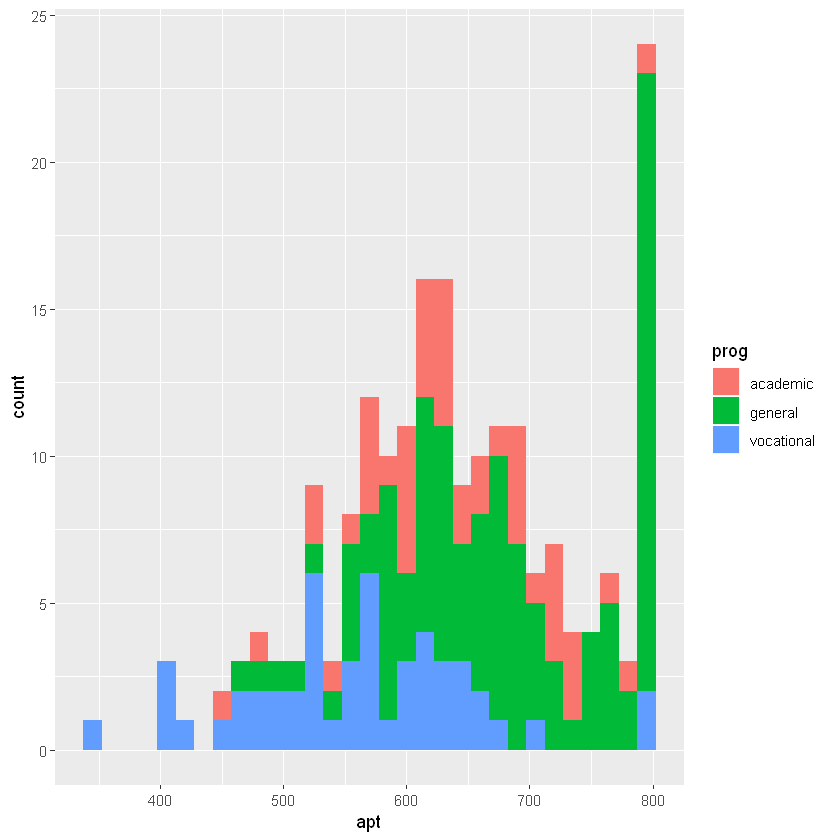

In [43]:
p + stat_bin(binwidth=15)

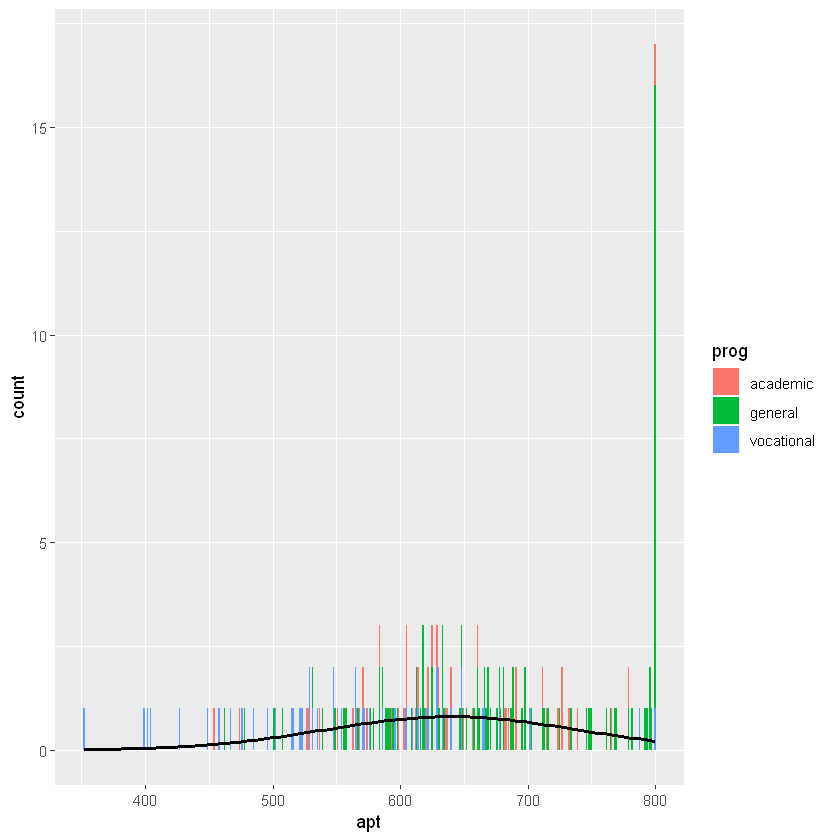

In [44]:
p + stat_bin(binwidth = 1) + stat_function(fun = f, size = 1, args = list(var = dat$apt, 
    bw = 1))

In [45]:
cor(dat[, c("read", "math", "apt")])

,read,math,apt
read,1.0000000,0.6622801,0.6451215
math,0.6622801,1.0000000,0.7332702
apt,0.6451215,0.7332702,1.0000000


In [47]:
# CRAN
install.packages("GGally")

Installing package into 'C:/Users/oldyu/R/win-library/3.5'
(as 'lib' is unspecified)


package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\oldyu\AppData\Local\Temp\Rtmpg3750f\downloaded_packages


In [48]:
library("GGally")


Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



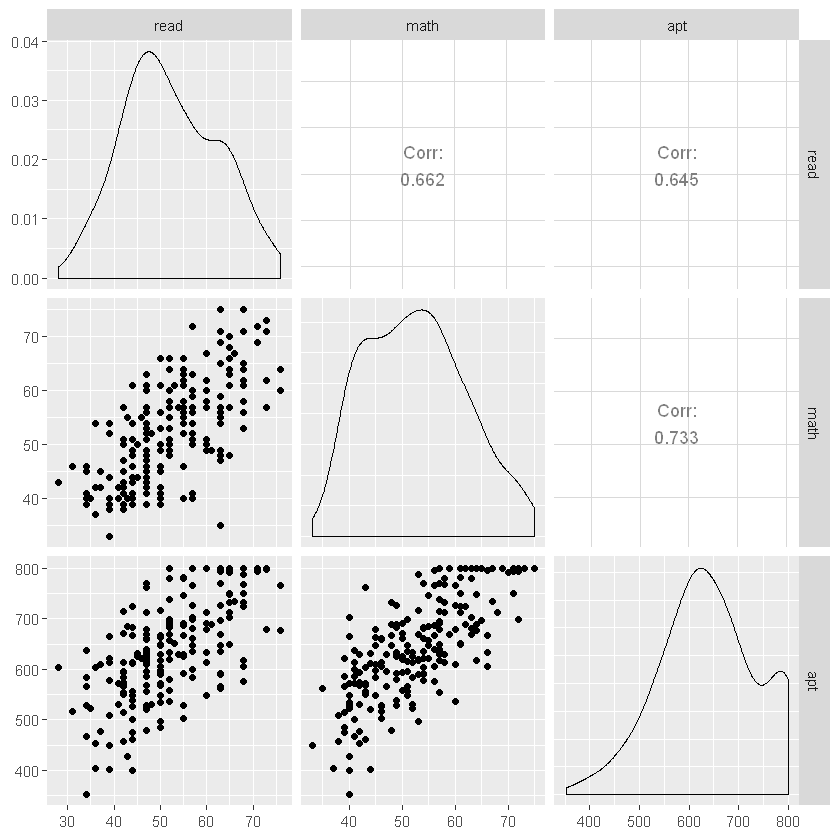

In [49]:
# plot matrix
ggpairs(dat[, c("read", "math", "apt")])

In [73]:
# Tobit model coefficients (sensoring from below at 0)
tobit1 <- tobit(apt ~ read + math + prog, data = dat,right = 800)
summary(tobit1)


Call:
tobit(formula = apt ~ read + math + prog, right = 800, data = dat)

Observations:
         Total  Left-censored     Uncensored Right-censored 
           200              0            183             17 

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    209.56597   32.77196   6.395 1.61e-10 ***
read             2.69794    0.61881   4.360 1.30e-05 ***
math             5.91448    0.70982   8.332  < 2e-16 ***
proggeneral    -12.71476   12.40646  -1.025 0.305434    
progvocational -46.14390   13.72419  -3.362 0.000773 ***
Log(scale)       4.18474    0.05301  78.946  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Scale: 65.68 

Gaussian distribution
Number of Newton-Raphson Iterations: 6 
Log-likelihood: -1041 on 6 Df
Wald-statistic: 297.3 on 4 Df, p-value: < 2.22e-16 


In [58]:
#Run our Tobit
tobitmodel <- censReg(apt ~ read + math + prog, data = dat,right = 800)
stargazer(tobitmodel,type='text')


                        Dependent variable:    
                    ---------------------------
                                apt            
-----------------------------------------------
read                         2.698***          
                              (0.619)          
                                               
math                         5.914***          
                              (0.710)          
                                               
proggeneral                   -12.715          
                             (12.406)          
                                               
progvocational              -46.144***         
                             (13.724)          
                                               
logSigma                     4.185***          
                              (0.053)          
                                               
Constant                    209.566***         
                             (32.772)  

In [59]:
summary(tobitmodel)


Call:
censReg(formula = apt ~ read + math + prog, right = 800, data = dat)

Observations:
         Total  Left-censored     Uncensored Right-censored 
           200              0            183             17 

Coefficients:
                Estimate Std. error t value  Pr(> t)    
(Intercept)    209.56597   32.77196   6.395 1.61e-10 ***
read             2.69794    0.61881   4.360 1.30e-05 ***
math             5.91448    0.70982   8.332  < 2e-16 ***
proggeneral    -12.71476   12.40646  -1.025 0.305434    
progvocational -46.14390   13.72419  -3.362 0.000773 ***
logSigma         4.18474    0.05301  78.946  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Newton-Raphson maximisation, 8 iterations
Return code 1: gradient close to zero
Log-likelihood: -1041.063 on 6 Df


The table labeled coefficients gives the coefficients, their standard errors, and the z-statistic. No p-values are included in the summary table, but we show how to calculate them below. Tobit regression coefficients are interpreted in the similar manner to OLS regression coefficients; however, the linear effect is on the uncensored latent variable, not the observed outcome. See McDonald and Moffitt (1980) for more details.

For a one unit increase in read, there is a 2.6981 point increase in the predicted value of apt.

A one unit increase in math is associated with a 5.9146 unit increase in the predicted value of apt.

The terms for prog have a slightly different interpretation. The predicted value of apt is -46.1419 points lower for students in a vocational program than for students in an academic program.

The coefficient labeled “(Intercept):1” is the intercept or constant for the model.

The coefficient labeled “(Intercept):2” is an ancillary statistic. If we exponentiate this value, we get a statistic that is analogous to the square root of the residual variance in OLS regression. The value of 65.6773 can compared to the standard deviation of academic aptitude which was 99.21, a substantial reduction.

The final log likelihood, -1041.0629, is shown toward the bottom of the output, it can be used in comparisons of nested models.

In [67]:
(ctable <- coef(summary(tobitmodel)))


,Estimate,Std. error,t value,Pr(> t)
(Intercept),209.565971,32.7719612,6.394673,1.608914e-10
read,2.697939,0.6188061,4.359911,1.301154e-05
math,5.914485,0.7098155,8.332426,7.920242e-17
proggeneral,-12.714763,12.4064575,-1.024850,3.054338e-01
progvocational,-46.143904,13.7241927,-3.362231,7.731546e-04
logSigma,4.184745,0.0530079,78.945679,0.000000e+00


In [70]:
tobitmodel2 <- censReg(apt ~ read + math, data = dat,right = 800)

(p <- pchisq(2 * (logLik(tobitmodel) - logLik(tobitmodel2)), df = 2, lower.tail = FALSE))

'log Lik.' 0.003155176 (df=6)

The LRT with two degrees of freedom is associated with a p-value of 0.0032, indicating that the overall effect of prog is statistically significant.

https://www.youtube.com/watch?v=IyBmwMtUHAc

https://sites.google.com/site/econometricsacademy/econometrics-models/limited-dependent-variable-models

In [28]:
# Limited Dependent Variable Models in R (Tobit, Truncated Regression)
# Copyright 2013 by Ani Katchova

# install.packages("VGAM")
library(VGAM)
# install.packages("AER")
library(AER)
# install.packages("truncreg")
library(truncreg)
# install.packages("censReg")
library(censReg)

In [25]:
mydata<- read.csv("limdep_ambexp.csv")
attach(mydata)

The following objects are masked from mydata (pos = 5):

    age, age2, agefem, ambexp, blhisp, dambexp, dhospexp, educ,
    fairpoor, female, ffs, good, hospexp, income, ins, instype,
    instype_s1, lambexp, lnambx, totchr, vgood, year01



In [78]:
head(mydata)

educ,age,income,female,vgood,good,hospexp,totchr,ffs,dhospexp,...,fairpoor,year01,instype,ambexp,lambexp,blhisp,instype_s1,dambexp,lnambx,ins
11,3.3,17.472,0,0,1,0,2,1,0,...,0,1,0,760,6.633318,0,0,1,6.633318,0
14,2.1,16.920,0,1,0,0,0,0,0,...,0,1,1,497,6.208590,1,0,1,6.208590,0
12,4.0,19.620,1,1,0,0,1,0,0,...,0,1,1,1002,6.909753,1,0,1,6.909753,0
14,5.2,8.563,1,0,1,0,0,0,0,...,0,1,1,745,6.613384,1,1,1,6.613384,1
16,5.0,25.360,1,1,0,0,0,0,0,...,0,1,1,2728,7.911324,0,0,1,7.911324,0
12,3.7,30.000,0,1,0,0,0,1,0,...,0,1,0,636,6.455199,0,0,1,6.455199,0


In [26]:
# Define variables
Y <- cbind(ambexp)
X <- cbind(age, female, totchr)

In [27]:
# Descriptive statistics
summary(Y)
summary(X)

     ambexp       
 Min.   :    0.0  
 1st Qu.:  113.0  
 Median :  534.5  
 Mean   : 1386.5  
 3rd Qu.: 1618.0  
 Max.   :49960.0  

      age            female           totchr      
 Min.   :2.100   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:3.100   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :4.000   Median :1.0000   Median :0.0000  
 Mean   :4.057   Mean   :0.5084   Mean   :0.4832  
 3rd Qu.:4.900   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :6.400   Max.   :1.0000   Max.   :5.0000  

In [29]:
# Tobit model coefficients (sensoring from below at 0)
tobit1 <- tobit(Y ~ X, left=0, right=Inf, data=mydata)
summary(tobit1)


Call:
tobit(formula = Y ~ X, left = 0, right = Inf, data = mydata)

Observations:
         Total  Left-censored     Uncensored Right-censored 
          3328            526           2802              0 

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.237e+03  1.818e+02  -6.805 1.01e-11 ***
Xage         3.328e+02  4.229e+01   7.871 3.52e-15 ***
Xfemale      6.911e+02  9.306e+01   7.427 1.11e-13 ***
Xtotchr      1.261e+03  6.067e+01  20.778  < 2e-16 ***
Log(scale)   7.860e+00  1.352e-02 581.404  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Scale: 2590 

Gaussian distribution
Number of Newton-Raphson Iterations: 3 
Log-likelihood: -2.639e+04 on 5 Df
Wald-statistic: 685.6 on 3 Df, p-value: < 2.22e-16 


In [30]:
stargazer(tobit1,type='text')


                   Dependent variable:    
               ---------------------------
                            Y             
------------------------------------------
Xage                   332.843***         
                        (42.288)          
                                          
Xfemale                691.126***         
                        (93.055)          
                                          
Xtotchr               1,260.687***        
                        (60.674)          
                                          
Constant              -1,237.282***       
                        (181.811)         
                                          
------------------------------------------
Observations              3,328           
Log Likelihood         -26,386.120        
Wald Test          685.604*** (df = 3)    
Note:          *p<0.1; **p<0.05; ***p<0.01


In [79]:
# Tobit model marginal effects for the censored sample
summary(margEff(tobit1))

ERROR: Error in margEff.default(tobit1): there is currently no default method available


In [31]:
tobit2 <- censReg(Y ~ X, left=0, right=Inf, data=mydata)
summary(tobit2)


Call:
censReg(formula = Y ~ X, left = 0, right = Inf, data = mydata)

Observations:
         Total  Left-censored     Uncensored Right-censored 
          3328            526           2802              0 

Coefficients:
              Estimate Std. error t value  Pr(> t)    
(Intercept) -1.237e+03  1.818e+02  -6.805 1.01e-11 ***
Xage         3.328e+02  4.229e+01   7.871 3.52e-15 ***
Xfemale      6.911e+02  9.306e+01   7.427 1.11e-13 ***
Xtotchr      1.261e+03  6.067e+01  20.778  < 2e-16 ***
logSigma     7.860e+00  1.352e-02 581.404  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Newton-Raphson maximisation, 7 iterations
Return code 1: gradient close to zero
Log-likelihood: -26386.12 on 5 Df


In [32]:
stargazer(tobit2,type='text')


                        Dependent variable:    
                    ---------------------------
                                 Y             
-----------------------------------------------
Xage                        332.843***         
                             (42.288)          
                                               
Xfemale                     691.126***         
                             (93.055)          
                                               
Xtotchr                    1,260.687***        
                             (60.674)          
                                               
logSigma                     7.860***          
                              (0.014)          
                                               
Constant                   -1,237.282***       
                             (181.811)         
                                               
-----------------------------------------------
Observations                   3,328   

In [33]:
# Tobit model marginal effects for the censored sample
summary(margEff(tobit2))


,Marg. Eff.,Std. Error,t value,Pr(>|t|)
Xage,219.9189,27.97836,7.860321,5.107026e-15
Xfemale,456.6465,61.45767,7.430259,1.372236e-13
Xtotchr,832.9713,40.74528,20.443381,0.000000e+00


In [34]:
# Probit model coefficients
probit1 <- glm(I(Y > 0) ~ X, data = mydata, family = binomial(link = "probit"))
summary(probit1)


Call:
glm(formula = I(Y > 0) ~ X, family = binomial(link = "probit"), 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4445   0.1661   0.4460   0.6266   0.9937  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 0.002353   0.106723   0.022    0.982    
Xage        0.132352   0.026201   5.051 4.39e-07 ***
Xfemale     0.628566   0.058639  10.719  < 2e-16 ***
Xtotchr     0.780712   0.070116  11.135  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2904.9  on 3327  degrees of freedom
Residual deviance: 2508.5  on 3324  degrees of freedom
AIC: 2516.5

Number of Fisher Scoring iterations: 6


In [77]:
# Truncated regression coefficients
# mydata.truncated <- subset(mydata, Y>0)
truncreg1 <- truncreg(Y ~ X, point = 0, direction = "left", data=mydata.truncated)
summary(truncreg1)

ERROR: Error in gbX * X: non-conformable arrays


In [36]:

# Test for Tobit versus Probit and Truncated regression
lrtest <- 2*(logLik(probit1) + logLik(truncreg1) - logLik(tobit1))
lrtest


ERROR: Error in logLik(truncreg1): object 'truncreg1' not found
